

# Gender of Parlement

Now, let's do the same for gender. We've never had a female Prime Minister, but let's see what the parlement looks like. Let's add `gender` to the query:

```
SELECT ?member ?dob ?start ?end ?genderLabel ?memberLabel
WHERE {
  ?member wdt:P39 wd:Q18887908;
          wdt:P569 ?dob;
          wdt:P21 ?gender;

  { ?member p:P39 ?position.
  ?position ps:P39 wd:Q18887908;
            pq:P580 ?start. }
  
  OPTIONAL { ?member p:P39 ?position.
  ?position ps:P39 wd:Q18887908;
            pq:P582 ?end. }
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]". }
} ORDER BY DESC(?start)
```

In [23]:
import json
import matplotlib.pyplot as plt
from datetime import date, datetime


In [24]:
def calc_age(birthdate, at_date):
    age = at_date.year - birthdate.year - ((at_date.month, at_date.day) < (birthdate.month, birthdate.day))
    return age

In [25]:
file = open('dutch-house-of-representatives.json')
members = json.load(file)
file.close()

years = range(1850, 2022)

gender_at_year = dict()
    
for year in years:
    for m in members:
        current_date = datetime(year, 1, 1)
        start_date = datetime.strptime(m["start"], '%Y-%m-%dT%H:%M:%SZ')
        if "end" in m:
            end_date = datetime.strptime(m["end"], '%Y-%m-%dT%H:%M:%SZ')
        else:
            # fallback end date, assume member will be out of office after 4 years
            today = datetime.today()
            end_date = datetime(today.year + 4, today.month, today.day)
        
        if start_date <= current_date <= end_date:
            gender = m["genderLabel"]
            
            if year in gender_at_year:
                gender_at_year[year].append(gender)
            else:
                gender_at_year[year] = [gender] 

female_percentages=[]

def is_female(gender):
    if gender == 'female':
        return True
    else:
        return False

for year, members in gender_at_year.items():
    total_members = len(members)
    number_of_female = len(list(filter(is_female, members)))
    female_percentages.append(round(number_of_female / total_members * 100))
    

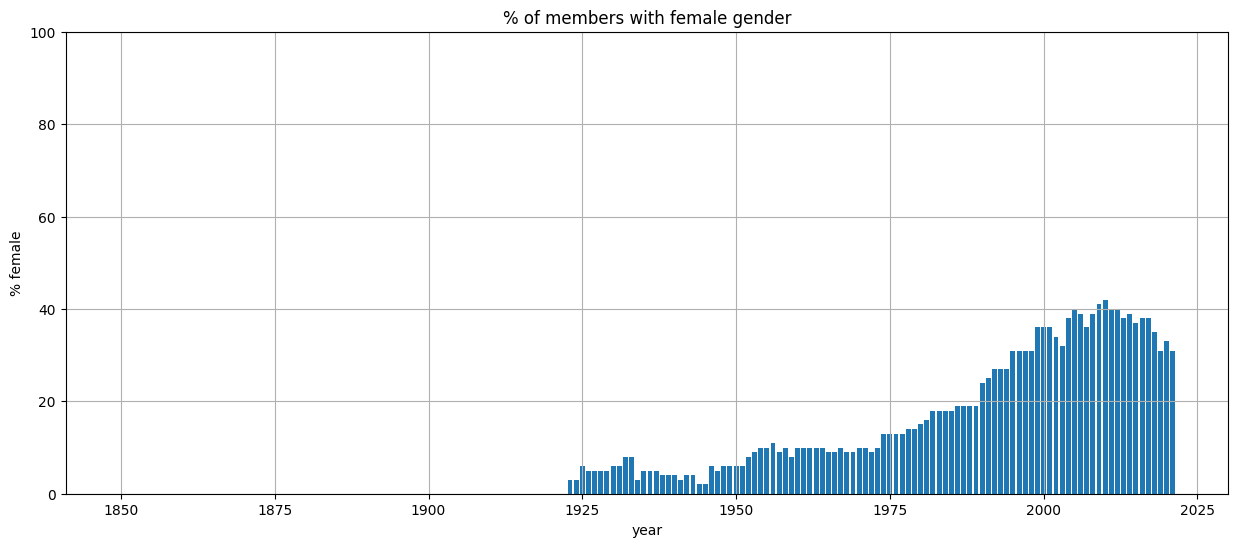

In [29]:
plt.subplots(figsize=(15, 6))
plt.bar(years, female_percentages)
plt.ylim(0, 100)
plt.grid()
plt.title("% of members with female gender")
plt.ylabel("% female")
plt.xlabel("year")
plt.show()
